In [1]:
import mxnet as mx
import numpy as np
import json
from net import InferenceModel
from scipy.misc import imresize

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
%matplotlib inline

In [4]:
_, arg_params, __ = mx.model.load_checkpoint("nic", 24)

In [6]:
vocab = json.load(open('vocab.json'))

In [7]:
inf_model = InferenceModel(1, len(vocab), 512, 512, arg_params)

In [8]:
img = mpimg.imread('test.jpg')

In [9]:
img.shape

(640, 427, 3)

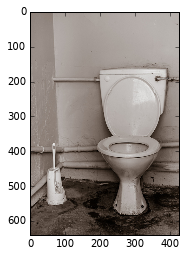

In [10]:
imgplot = plt.imshow(img)

In [11]:
img = imresize(img, (224, 224))

In [12]:
img = img.transpose(2, 0, 1).reshape(1, 3, 224, 224)

In [13]:
probs, index = inf_model.generate(mx.nd.array(img))

In [14]:
print index

[array([231]), array([577]), array([794]), array([231]), array([808]), array([411]), array([231]), array([808]), array([619]), array([231]), array([808]), array([0])]


In [15]:
def revert_vocab(vocab):
    dic = {}
    for k, v in vocab.items():
        dic[v] = k
    dic[0] = '.'
    return dic

In [16]:
def decode2cap(index, revocab):
    words = map(lambda x: revocab[x[0]], index)
    return ' '.join(words)

In [17]:
revocab = revert_vocab(vocab)

In [18]:
decode2cap(index, revocab)

u'a bathroom with a toilet and a toilet in a toilet .'